# 3.4.2 Quadratic Programming

### Introduction

Quadratic Programming (QP) is an optimization technique that deals with minimizing or maximizing a quadratic objective function subject to linear constraints. It is widely used in various fields, including finance, engineering, and machine learning. In this context, we will explore its application in portfolio optimization.

## Readings:
- [Quadratic programming](https://optimization.cbe.cornell.edu/index.php?title=Quadratic_programming#:~:text=Quadratic%20programming%20(QP)%20is%20the,be%20both%20equalities%20and%20inequalities.)
- [Linear and Quadratic Programming](https://rendazhang.medium.com/optimization-theory-series-6-linear-and-quadratic-programming-41f1172c2567)
- [Quadratic programming - Book Extract (pdf)](https://busoniu.net/teaching/opt18en/ln4_qp.pdf)
- [Quadratic programming_Lagrange (pdf)](https://people.duke.edu/~hpgavin/cee201/QP_Lagrange.pdf)

<hr>

### Example Problem

We will solve a simple quadratic programming problem where we want to minimize the function:

$$
f(x, y) = x^2 + y^2 + 2xy
$$

subject to the following constraints:
$$ x + y = 1 $$
$$ x \ge 0 $$
$$ y \ge 0 $$

This example illustrates the basic concepts and methods of quadratic programming in an intuitive and straightforward manner.

In [1]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

In [2]:
# Define the quadratic objective function
def objective(z):
    x, y = z
    return x**2 + y**2 + 2*x*y

In [3]:
# Constraints: x + y = 1 and x, y >= 0
constraints = [
    {'type': 'eq', 'fun': lambda z: z[0] + z[1] - 1},
    {'type': 'ineq', 'fun': lambda z: z[0]},
    {'type': 'ineq', 'fun': lambda z: z[1]}
]

In [4]:
# Initial guess
x0 = np.array([0.5, 0.5])

# Solve the quadratic programming problem
result = minimize(objective, x0, constraints=constraints)

# Extract the results
optimal_x, optimal_y = result.x
min_value = result.fun

print(f"Optimal x: {optimal_x:.4f}")
print(f"Optimal y: {optimal_y:.4f}")
print(f"Minimum value of the function: {min_value:.4f}")

Optimal x: 0.5000
Optimal y: 0.5000
Minimum value of the function: 1.0000


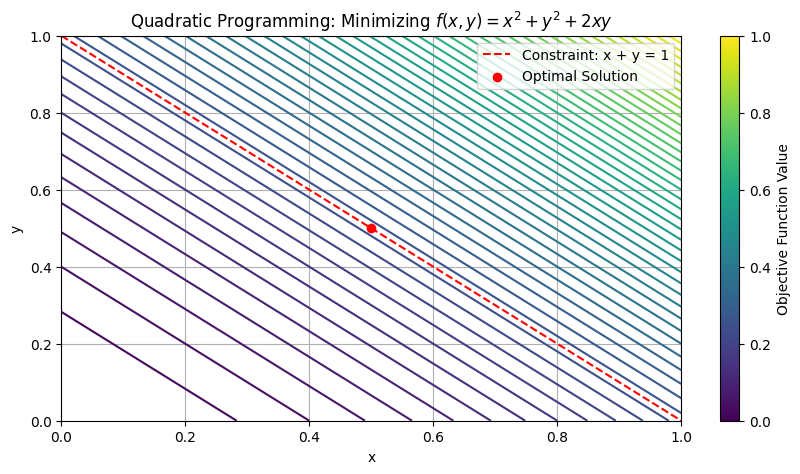

In [5]:
# Visualization
x = np.linspace(0, 1, 100)
y = np.linspace(0, 1, 100)
X, Y = np.meshgrid(x, y)
Z = X**2 + Y**2 + 2*X*Y

# 2D Contour Plot
plt.figure(figsize=(10, 5))
plt.contour(X, Y, Z, levels=50, cmap='viridis')
plt.plot(x, 1 - x, 'r--', label='Constraint: x + y = 1')
plt.scatter(optimal_x, optimal_y, color='red', label='Optimal Solution')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Quadratic Programming: Minimizing $f(x, y) = x^2 + y^2 + 2xy$')
plt.colorbar(label='Objective Function Value')
plt.legend()
plt.grid(True)
plt.show()

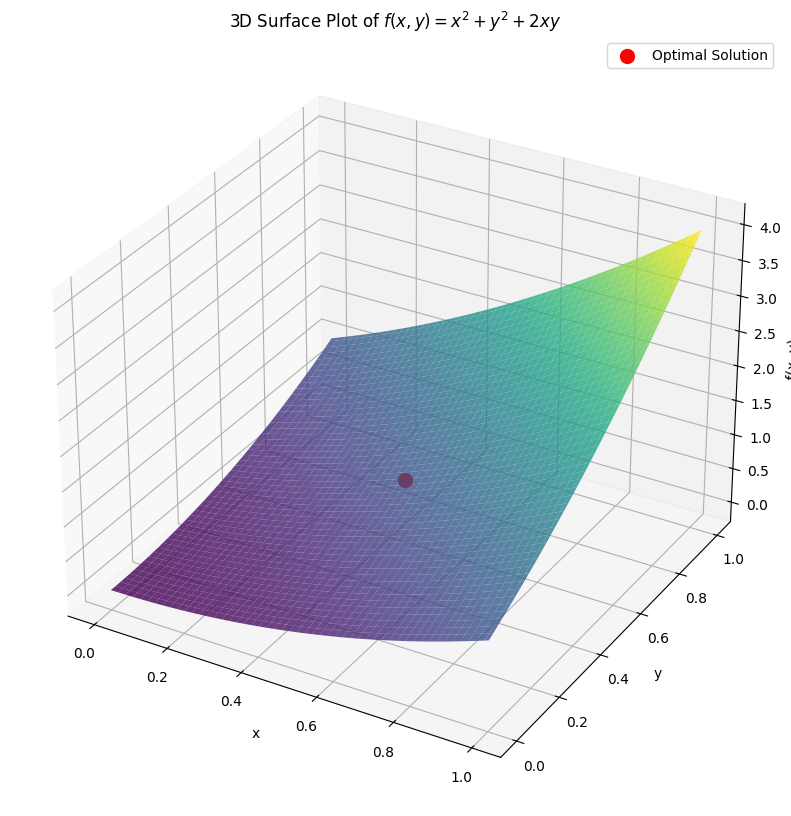

In [6]:
# 3D Surface Plot
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')
ax.scatter(optimal_x, optimal_y, min_value, color='red', label='Optimal Solution', s=100)
ax.set_title('3D Surface Plot of $f(x, y) = x^2 + y^2 + 2xy$')
ax.legend()
plt.show()

<hr>

## Portfolio Optimization Problem

Consider an investor who wants to allocate funds between two assets to minimize the portfolio risk (variance) while achieving a certain expected return. This can be formulated as a quadratic programming problem:

1. **Objective Function**: Minimize the portfolio variance:
   $$
   \text{Minimize} \quad f(x) = \frac{1}{2} x^T Q x
   $$
   where \( Q \) is the covariance matrix of the returns of the assets, and \( x \) is the allocation vector.

1. **Constraints**:
$$ x_1 + x_2 = 1 $$ (Total allocation constraint)
$$ x_1 \ge 0 $$
$$ x_2 \ge 0 $$

The covariance matrix \( Q \) represents the variance and covariance of the returns of the two assets. The allocation vector \( x \) indicates the proportion of the total funds invested in each asset.


In [7]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

In [8]:
# Covariance matrix (Q) of the returns of two assets
Q = np.array([[0.1, 0.02], [0.02, 0.08]])

# Total allocation constraint (sum of allocations must be 1)
A_eq = np.array([[1, 1]])
b_eq = np.array([1])

# Bounds for allocations (each allocation must be between 0 and 1)
bounds = [(0, 1), (0, 1)]

In [9]:
# Objective function: Portfolio variance
def objective(x):
    return 0.5 * np.dot(x.T, np.dot(Q, x))

In [10]:
# Solve the quadratic programming problem
result = minimize(objective, x0=np.array([0.5, 0.5]), constraints={'type': 'eq', 'fun': lambda x: np.dot(A_eq, x) - b_eq}, bounds=bounds)

# Extract the results
allocation = result.x
min_risk = result.fun

print(f"Optimal allocation for Asset 1: {allocation[0]:.4f}")
print(f"Optimal allocation for Asset 2: {allocation[1]:.4f}")
print(f"Minimum portfolio risk (variance): {min_risk:.4f}")

Optimal allocation for Asset 1: 0.4286
Optimal allocation for Asset 2: 0.5714
Minimum portfolio risk (variance): 0.0271


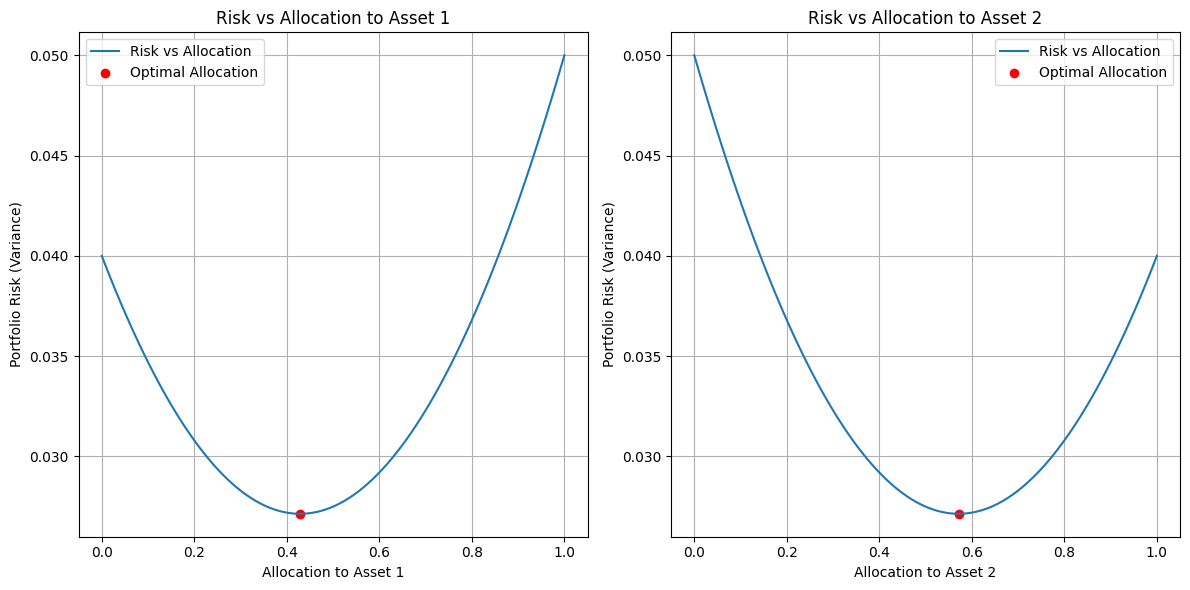

In [11]:
# Visualization
plt.figure(figsize=(12, 6))

# Plot Risk vs Allocation for Asset 1
plt.subplot(1, 2, 1)
x = np.linspace(0, 1, 100)
y = 1 - x
risk = 0.5 * (Q[0, 0] * x**2 + Q[1, 1] * y**2 + 2 * Q[0, 1] * x * y)

plt.plot(x, risk, label='Risk vs Allocation')
plt.scatter(allocation[0], min_risk, color='red', label='Optimal Allocation')
plt.xlabel('Allocation to Asset 1')
plt.ylabel('Portfolio Risk (Variance)')
plt.title('Risk vs Allocation to Asset 1')
plt.legend()
plt.grid(True)

# Plot Risk vs Allocation for Asset 2
plt.subplot(1, 2, 2)
plt.plot(y, risk, label='Risk vs Allocation')
plt.scatter(allocation[1], min_risk, color='red', label='Optimal Allocation')
plt.xlabel('Allocation to Asset 2')
plt.ylabel('Portfolio Risk (Variance)')
plt.title('Risk vs Allocation to Asset 2')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

## Conclusion

Quadratic Programming (QP) is a powerful optimization technique for problems where the objective function is quadratic and the constraints are linear. In this example, we demonstrated how to apply QP to a portfolio optimization problem. We aimed to minimize the portfolio risk (variance) while ensuring that the total allocation across two assets sums to one.

The solution provided the optimal allocation of funds between the two assets to minimize the portfolio risk. By visualizing the relationship between asset allocation and portfolio risk, we could clearly identify the optimal allocation point.

Quadratic programming enables decision-makers to optimize complex systems effectively, making it a valuable tool in finance and other fields requiring advanced optimization techniques.
